In [2]:
from qiskit import QuantumCircuit
from qiskit.providers.basic_provider import BasicSimulator
from qiskit.visualization import plot_histogram
from qiskit.primitives import BackendSampler
from qiskit.quantum_info import SparsePauliOp
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import EstimatorV2 as Estimator
from qiskit.quantum_info import SparsePauliOp
from qiskit_ibm_runtime import EstimatorV2 as Estimator
from numpy import pi
import numpy as np
import matplotlib.pyplot as plt

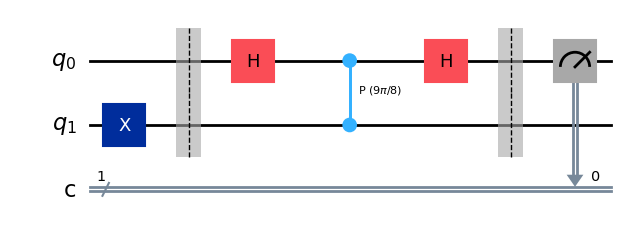

In [3]:
qc = QuantumCircuit(2,1)

qc.x(1)
qc.barrier()
qc.h(0)
qc.cp(9*pi/8,0,1)
qc.h(0)
qc.barrier()
qc.measure(0,0)
qc.draw("mpl")



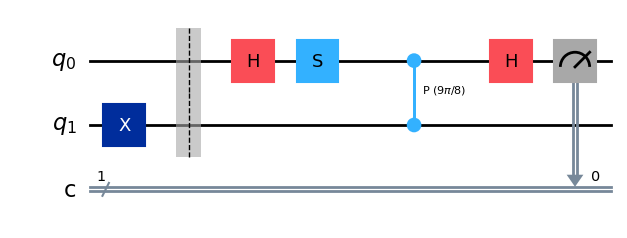

In [4]:
qc2 = QuantumCircuit(2,1)
qc2.x(1)
qc2.barrier()
qc2.h(0)
qc2.s(0)
qc2.cp(9*pi/8,0,1)
qc2.h(0)
qc2.measure(0,0)
qc2.draw("mpl")

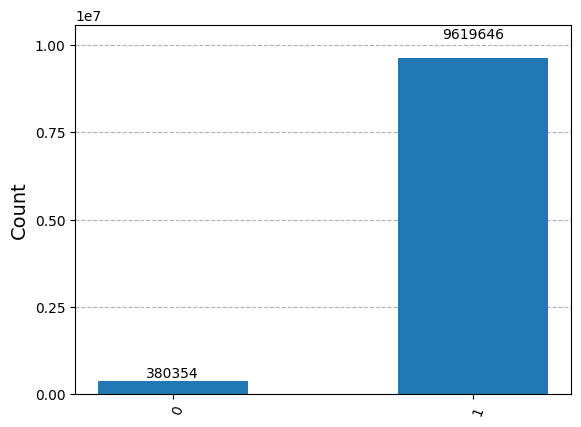

In [26]:
backend = BasicSimulator()

# If you do not specify the number of shots, the default is 1024
result = backend.run(qc, shots=10000000).result()   

# Extract the counts of 0 and 1 measurements
counts = result.get_counts()                    
plot_histogram(counts)

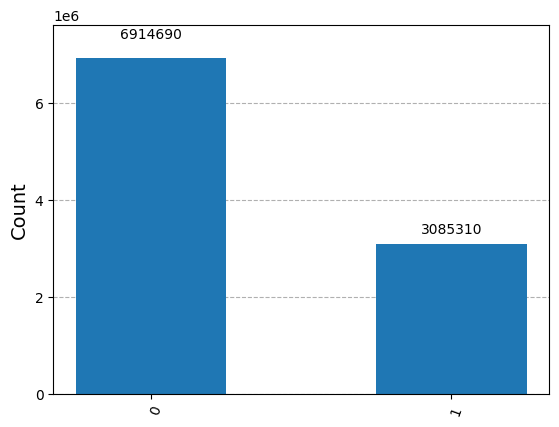

In [27]:
# If you do not specify the number of shots, the default is 1024
result2 = backend.run(qc2, shots=10000000).result()   

# Extract the counts of 0 and 1 measurements
counts2 = result2.get_counts()                    
plot_histogram(counts2)

In [31]:
print(counts)
re = 1-(2*counts['1']/10000000)
im = (2*counts2['1']/10000000)-1
phi1 = np.arccos(re)/(2*pi)
phi2 = np.arcsin(im)/(2*pi)
print("Phi 1: ", phi1, "\nPhi 2: ", phi2)
print("What we got: ", phi1)
print("What we want: ", (9*pi/8) / (2*pi))

{'1': 9619646, '0': 380354}
-0.9239291999999999 -0.382938
Phi 1:  0.43752065954391767 
Phi 2:  -0.06254385637833944
What we got:  0.43752065954391767
What we want:  0.5625
